# Cluster 1: Profit and Loss vs. Times Chosen per Choice

This cluster aims to spot a trend/correlation between the total net profit/loss made by each subject for each choice option and the proportion of times they chose that option.

Each subject will have the total profits/losses for choice 1, 2, 3 and 4, meaning there are 2468 [number of subjects=617] x [4 choices] datapoints in the graph.

## Importing Relevant Packages and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from functions import *

In [2]:
choice_95 = pd.DataFrame(pd.read_csv('../data/choice_95.csv'))
win_95 = pd.DataFrame(pd.read_csv('../data/wi_95.csv'))
loss_95 = pd.DataFrame(pd.read_csv('../data/lo_95.csv'))

choice_100 = pd.DataFrame(pd.read_csv('../data/choice_100.csv'))
win_100 = pd.DataFrame(pd.read_csv('../data/wi_100.csv'))
loss_100 = pd.DataFrame(pd.read_csv('../data/lo_100.csv'))

choice_150 = pd.DataFrame(pd.read_csv('../data/choice_150.csv'))
win_150 = pd.DataFrame(pd.read_csv('../data/wi_150.csv'))
loss_150 = pd.DataFrame(pd.read_csv('../data/lo_150.csv'))

## Assigning Variables for Net Profit/Loss and Choice Proportions and Visualising them

In [3]:
## Creating initial lists with only the 95-trial dataset
output_95 = create_net_profit_vs_count_list(choice_95, win_95, loss_95)
profit_loss_list = output_95[0]
chosen_count = output_95[1]

# Adding the 100-trial dataset to the lists
output_100 = create_net_profit_vs_count_list(choice_100, win_100, loss_100,
                                            profit_loss_list, chosen_count)
profit_loss_list = output_100[0]
chosen_count = output_100[1]

# Adding the 150-trial dataset and having our final list
output_150 = create_net_profit_vs_count_list(choice_150, win_150, loss_150,
                                            profit_loss_list, chosen_count)
profit_loss_list = output_150[0]
chosen_count = output_150[1]

In [4]:
tmp_list = []
for subject in range(0,len(profit_loss_list)):
    for choice in range(0,4):
        tmp_list.append([profit_loss_list[subject][choice],chosen_count[subject][choice]])
cluster_array = np.array(tmp_list)

The above code snippet is used to arrange the data into arrays, to be passed to clustering algorithms at a later stage.

The graph below shows the scatterplot for the proportion of times each choice was picked by a subject and the net profit or loss the same subject made with that choice in total.

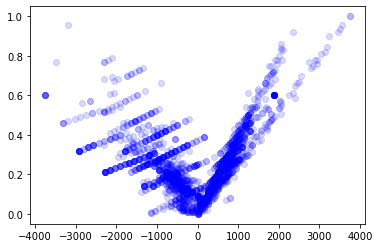

In [5]:
plt.scatter(
   cluster_array[:, 0], cluster_array[:, 1],
   c='blue', alpha = 0.15
)

## Using Elbow Method to Identify Optimal K for K-Means Algorithm 

In [6]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_array)
    Sum_of_squared_distances.append(km.inertia_)

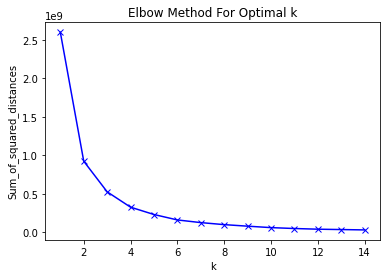

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the above graph, the 'elbow' point appears to be at k = 4.

As there are four choices that the datapoints are classed as, having k = 4 makes the most sense to allow comparisons between predicted clusters and the actual classes of each datapoint.

## Creating a Cluster for each Choice Option using the K-Means Algorithm

In [8]:
kmeans = KMeans(
    n_clusters=4, init='random',
    n_init=1, 
    tol=1e-04, random_state=2
)

y_km = kmeans.fit_predict(cluster_array)

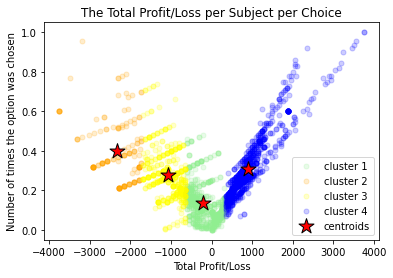

In [9]:
plt.scatter(
    cluster_array[y_km == 0, 0], cluster_array[y_km == 0, 1],
    s=25, c='lightgreen',
    marker='o', alpha = 0.2,
    label='cluster 1'
)

plt.scatter(
    cluster_array[y_km == 1, 0], cluster_array[y_km == 1, 1],
    s=25, c='orange',
    marker='o', alpha = 0.2,
    label='cluster 2'
)

plt.scatter(
    cluster_array[y_km == 2, 0], cluster_array[y_km == 2, 1],
    s=25, c='yellow',
    marker='o', alpha = 0.2,
    label='cluster 3'
)

plt.scatter(
    cluster_array[y_km == 3, 0], cluster_array[y_km == 3, 1],
    s=25, c='blue',
    marker='o', alpha = 0.2,
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)

## Creating Same Clusters using the K-Means Algorithm (where maximum iterations is 300)

In [10]:
kmeans2 = KMeans(
    n_clusters=4, init='random',
    n_init=1, max_iter = 300,
)

y_km2 = kmeans2.fit_predict(cluster_array)

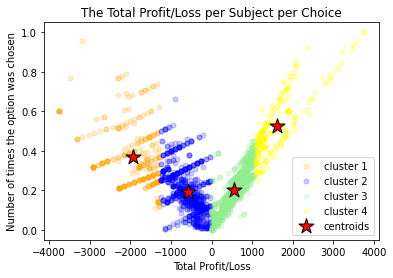

In [11]:
# plot the 4 clusters
plt.scatter(
    cluster_array[y_km2 == 0, 0], cluster_array[y_km2 == 0, 1],
    s=25, c='orange',
    marker='o', alpha = 0.2,
    label='cluster 1'
)

plt.scatter(
    cluster_array[y_km2 == 1, 0], cluster_array[y_km2 == 1, 1],
    s=25, c='blue',
    marker='o', alpha = 0.2,
    label='cluster 2'
)

plt.scatter(
    cluster_array[y_km2 == 2, 0], cluster_array[y_km2 == 2, 1],
    s=25, c='lightgreen',
    marker='o', alpha = 0.2,
    label='cluster 3'
)

plt.scatter(
    cluster_array[y_km2 == 3, 0], cluster_array[y_km2 == 3, 1],
    s=25, c='yellow',
    marker='o', alpha = 0.2,
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)

## Comparing clustering algorithm to the original choices

In [12]:
option = [1,2,3,4]*(len(profit_loss_list))
option_array = np.array(option)

In [13]:
option_array

array([1, 2, 3, ..., 2, 3, 4])

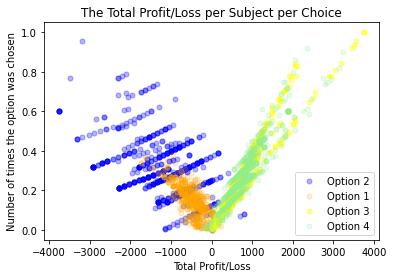

In [14]:
plt.scatter(
    cluster_array[option_array == 2, 0], cluster_array[option_array == 2, 1],
    s=25, alpha=0.3, c='blue',
    marker='o',
    label='Option 2'
)

plt.scatter(
    cluster_array[option_array == 1, 0], cluster_array[option_array == 1, 1],
    s=25, alpha=0.2, c='orange',
    marker='o',
    label='Option 1'
)

plt.scatter(
    cluster_array[option_array == 3, 0], cluster_array[option_array == 3, 1],
    s=25, alpha=0.4, c='yellow',
    marker='o',
    label='Option 3'
)

plt.scatter(
    cluster_array[option_array == 4, 0], cluster_array[option_array == 4, 1],
    s=25, alpha=0.2, c='lightgreen',
    marker='o',
    label='Option 4'
)

plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)

# Conclusions of Cluster Analyses

The clusters produced above are quite accurate in comparison to the real class it belongs to, in this case, the deck options 1, 2, 3 and 4. 

There is quite a noticeable split in the graph (at y=0), where there are two sets of data points on the left that are sloped downward, and two sets of datapoints on the right that are sloping upwards. This is an interesting observations as the datasets left and right of y=0 are split by what are considered the 'good decks' and 'bad decks'.

The 'bad decks' are deck 1 and 2, whilst the good decks are deck 3 and 4. Option 1 was the least chosen deck amongst participants, this is explained not only by it being considered a 'bad deck', but also as it is a deck with 'frequent losses', as stated [here](https://openpsychologydata.metajnl.com/articles/10.5334/jopd.ak/).

The use of the elbow method helped identify that the optimal number of clusters was 4, which was the original amount of classes, allowing for easier comparison. The cluster with 300 maximum iterations outperforms the other cluster. The k-means algorithm worked quite well in identifying the four classes (four choice options), as shown below.

## Real Cluster Assignments
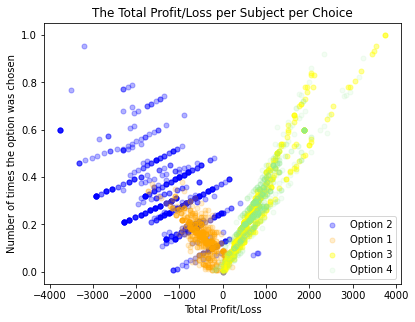

## Predicted Clustered Assignments
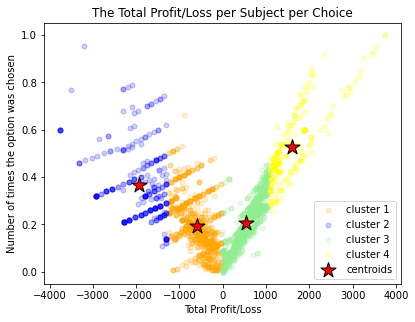